In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
YR   = 365.2563
name = "Salida.txt"

try:
    data = np.genfromtxt(name)
except ValueError as err:
    try:
        data = np.genfromtxt(name, skip_footer=1)
        print("Still writing...")
    except:
        raise ValueError (err)
print("Shape:", data.shape)
N = data.shape[0]

Shape: (4975, 17)


In [3]:
df = pd.DataFrame(data)
df = df.rename(columns=dict(
    zip(df.columns,
     ["s0", "o0",
     "a1", "K1", "s1", "o1", "H1",
     "a2", "K2", "s2", "o2", "H2",
     "n1", "n2",
     "t", "dt", "dt_adap"])
    ))
df.t       /= YR
df.dt      /= YR
df.dt_adap /= YR
df["e1"] = np.sqrt(df.K1**2 + df.H1**2)
df["e2"] = np.sqrt(df.K2**2 + df.H2**2)
df["w1"] = np.arctan2(df.H1, df.K1)
df["w2"] = np.arctan2(df.H2, df.K2)
display(df)

,s0,o0,a1,K1,s1,o1,H1,a2,K2,s2,...,H2,n1,n2,t,dt,dt_adap,e1,e2,w1,w2
0,0.224399,0.436332,0.050000,0.100000,628.305981,1.396267e+00,0.000002,0.200000,-0.100000,628.318562,...,-1.533575e-08,1.538605,0.192417,2.800000e-03,9.999999e-05,0.001000,0.100000,0.100000,0.000024,-3.141593
1,0.224399,0.436332,0.050000,0.100000,628.305532,1.396267e+00,0.000002,0.200000,-0.100000,628.318562,...,-1.557123e-08,1.538605,0.192417,2.900000e-03,9.999999e-05,0.001000,0.100000,0.100000,0.000025,-3.141592
2,0.224399,0.436332,0.050000,0.100000,628.305083,1.396267e+00,0.000003,0.200000,-0.100000,628.318562,...,-1.580671e-08,1.538605,0.192417,3.000000e-03,9.999999e-05,0.001000,0.100000,0.100000,0.000026,-3.141592
3,0.224399,0.436332,0.050000,0.100000,628.304633,1.396267e+00,0.000003,0.200000,-0.100000,628.318562,...,-1.604219e-08,1.538605,0.192417,3.100000e-03,9.999999e-05,0.001000,0.100000,0.100000,0.000027,-3.141592
4,0.224399,0.436332,0.050000,0.100000,628.304184,1.396267e+00,0.000003,0.200000,-0.100000,628.318562,...,-1.627767e-08,1.538605,0.192417,3.200000e-03,9.999999e-05,0.001000,0.100000,0.100000,0.000027,-3.141592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4970,0.224400,0.436330,0.039518,0.020653,2.195884,1.000000e-15,0.006638,0.202417,0.096224,0.200578,...,3.092784e-02,2.189701,0.188981,4.862701e+09,2.751284e+07,49.868477,0.021693,0.101072,0.310967,0.310985
4971,0.224400,0.436330,0.039428,-0.021495,2.203373,1.000000e-15,-0.002275,0.202417,-0.100493,0.200574,...,-1.063973e-02,2.197214,0.188982,4.890370e+09,2.766939e+07,223.892548,0.021615,0.101054,-3.036128,-3.036110
4972,0.224400,0.436330,0.039337,-0.002971,2.211017,1.000000e-15,0.021331,0.202417,-0.013938,0.200570,...,1.000698e-01,2.204881,0.188982,4.918197e+09,2.782684e+07,46.855730,0.021536,0.101036,1.709168,1.709187
4973,0.224400,0.436330,0.039244,-0.008499,2.218820,1.000000e-15,0.019701,0.202417,-0.040017,0.200565,...,9.275294e-02,2.212707,0.188982,4.946183e+09,2.798518e+07,30.751710,0.021456,0.101017,1.978084,1.978103


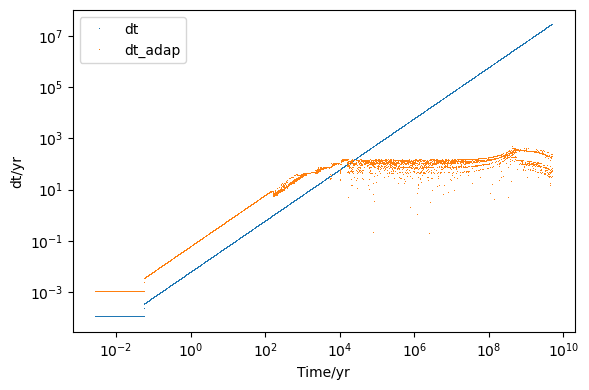

In [4]:
plt.figure(dpi=100)
plt.plot(df.t, df.dt, ',', label='dt')
plt.plot(df.t, df.dt_adap, ',', label='dt_adap')
plt.xlabel("Time/yr")
plt.ylabel("dt/yr")
plt.semilogx()
plt.semilogy()
plt.legend()
plt.tight_layout()
plt.show()

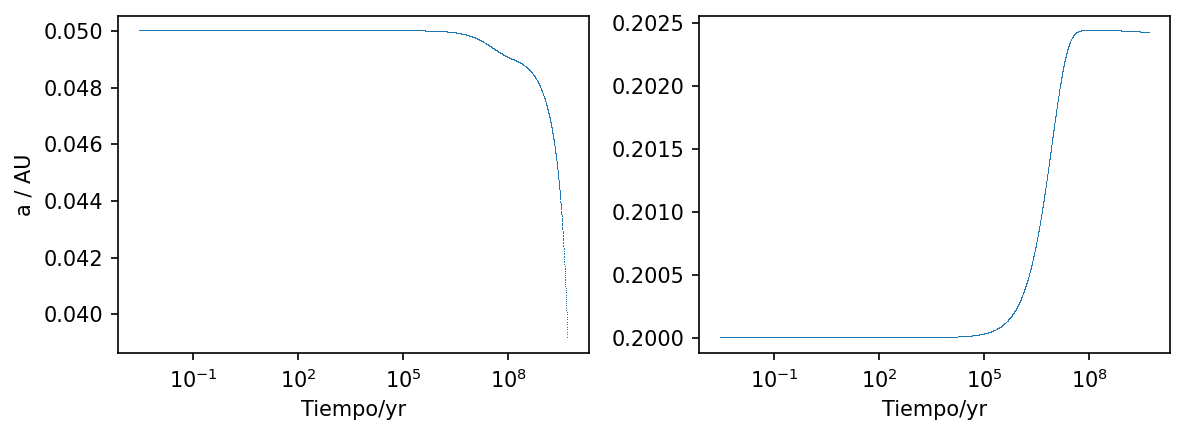

In [5]:
plt.figure(dpi=150, figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(df.t, df.a1, ',')
plt.xlabel("Tiempo/yr")
plt.ylabel("a / AU")
plt.semilogx()
plt.subplot(1,2,2)
plt.plot(df.t, df.a2, ',')
plt.xlabel("Tiempo/yr")
plt.semilogx()
plt.tight_layout()
plt.show()

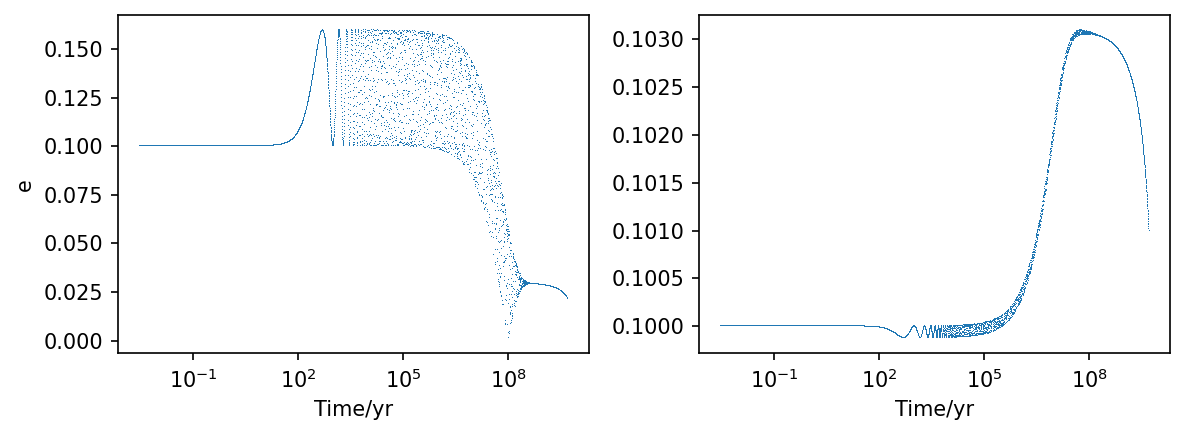

In [6]:
plt.figure(dpi=150, figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(df.t, df.e1, ',')
plt.xlabel("Time/yr")
plt.ylabel("e")
plt.semilogx()
plt.subplot(1,2,2)
plt.plot(df.t, df.e2, ',')
plt.xlabel("Time/yr")
plt.semilogx()
plt.tight_layout()
plt.show()

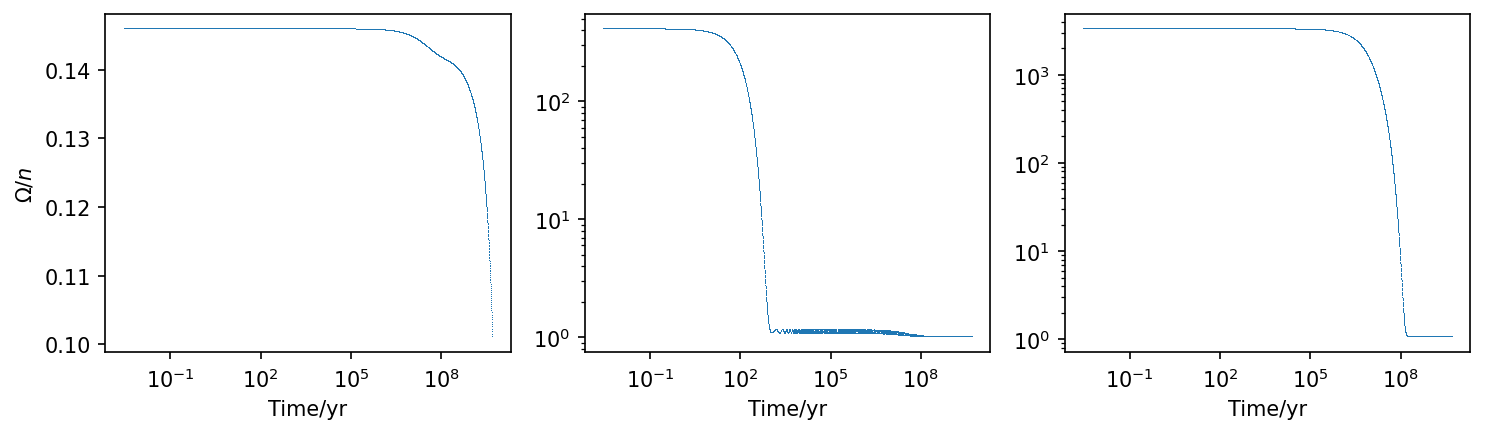

In [7]:
plt.figure(dpi=150, figsize=(10,3))
plt.subplot(1,3,1)
plt.plot(df.t, df.s0/df.n1, ',')
plt.xlabel("Time/yr")
plt.ylabel("$\Omega / n$")
plt.semilogx()
plt.subplot(1,3,2)
plt.plot(df.t, df.s1/df.n1, ',')
plt.xlabel("Time/yr")
plt.semilogx()
plt.semilogy()
plt.subplot(1,3,3)
plt.plot(df.t, df.s2/df.n2, ',')
plt.xlabel("Time/yr")
plt.semilogx()
plt.semilogy()
plt.tight_layout()
plt.show()

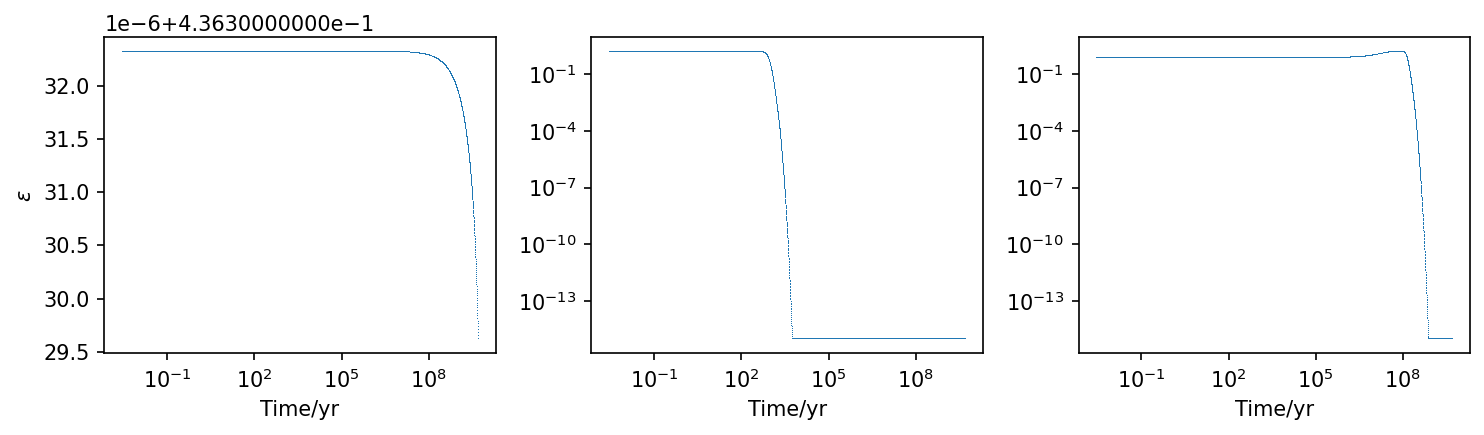

In [8]:
plt.figure(dpi=150, figsize=(10,3))
plt.subplot(1,3,1)
plt.plot(df.t, df.o0, ',')
plt.xlabel("Time/yr")
plt.ylabel("$\epsilon$")
plt.semilogx()
plt.subplot(1,3,2)
plt.plot(df.t, df.o1, ',')
plt.xlabel("Time/yr")
plt.semilogx()
plt.semilogy()
plt.subplot(1,3,3)
plt.plot(df.t, df.o2, ',')
plt.xlabel("Time/yr")
plt.semilogx()
plt.semilogy()
plt.tight_layout()
plt.show()

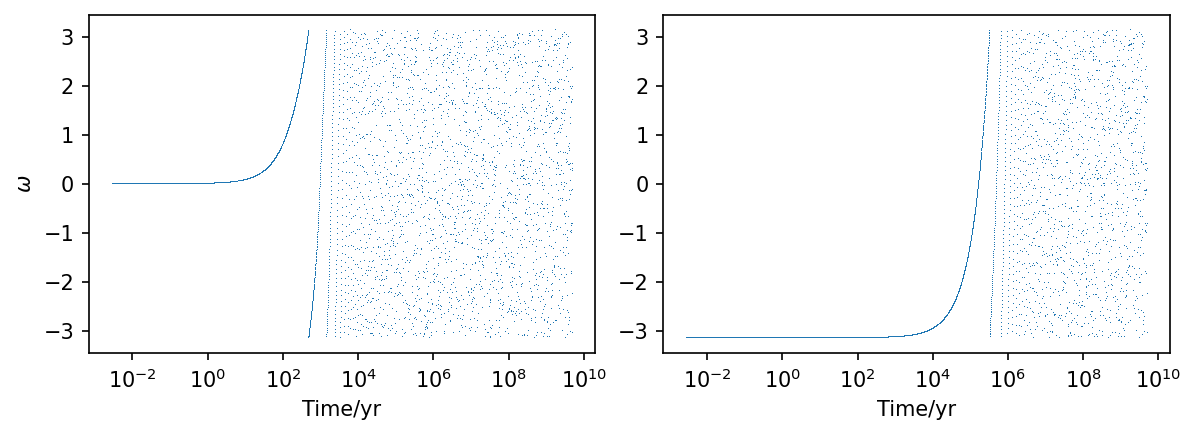

In [9]:
plt.figure(dpi=150, figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(df.t, df.w1, ',')
plt.xlabel("Time/yr")
plt.ylabel("$\omega$")
plt.semilogx()
plt.subplot(1,2,2)
plt.plot(df.t, df.w2, ',')
plt.xlabel("Time/yr")
plt.semilogx()
plt.tight_layout()
plt.show()

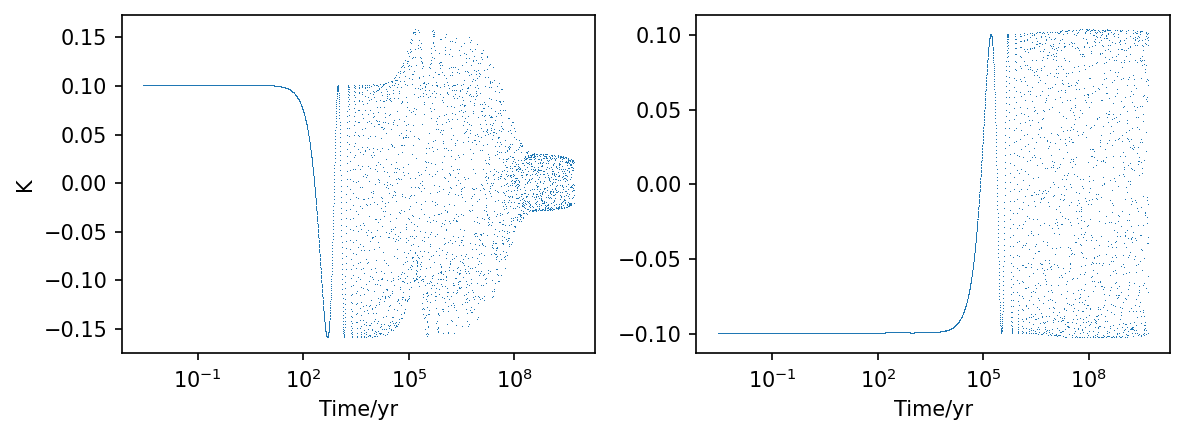

In [10]:
plt.figure(dpi=150, figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(df.t, df.K1, ',')
plt.semilogx()
plt.xlabel("Time/yr")
plt.ylabel("K")
plt.subplot(1,2,2)
plt.plot(df.t, df.K2, ',')
plt.semilogx()
plt.xlabel("Time/yr")
plt.tight_layout()
plt.show()

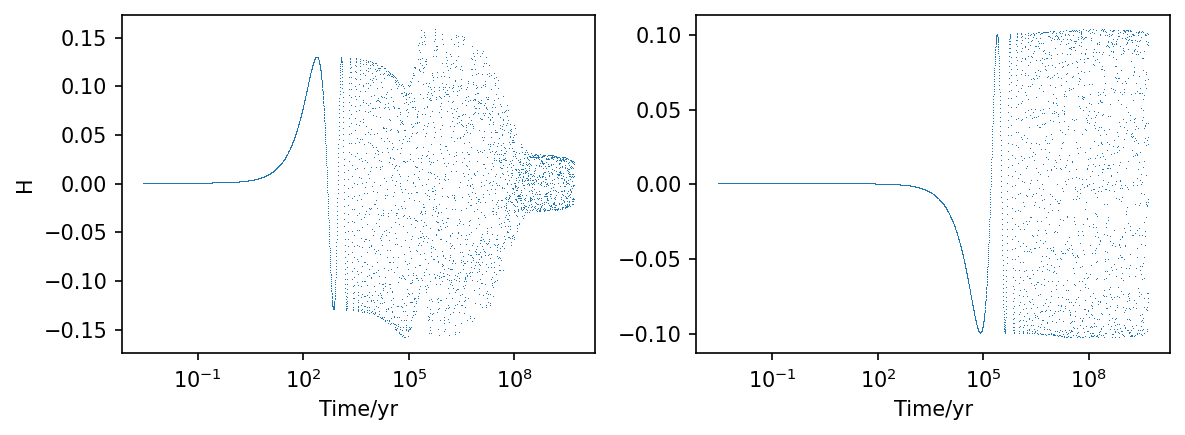

In [11]:
plt.figure(dpi=150, figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(df.t, df.H1, ',')
plt.semilogx()
plt.xlabel("Time/yr")
plt.ylabel("H")
plt.subplot(1,2,2)
plt.plot(df.t, df.H2, ',')
plt.semilogx()
plt.xlabel("Time/yr")
plt.tight_layout()
plt.show()

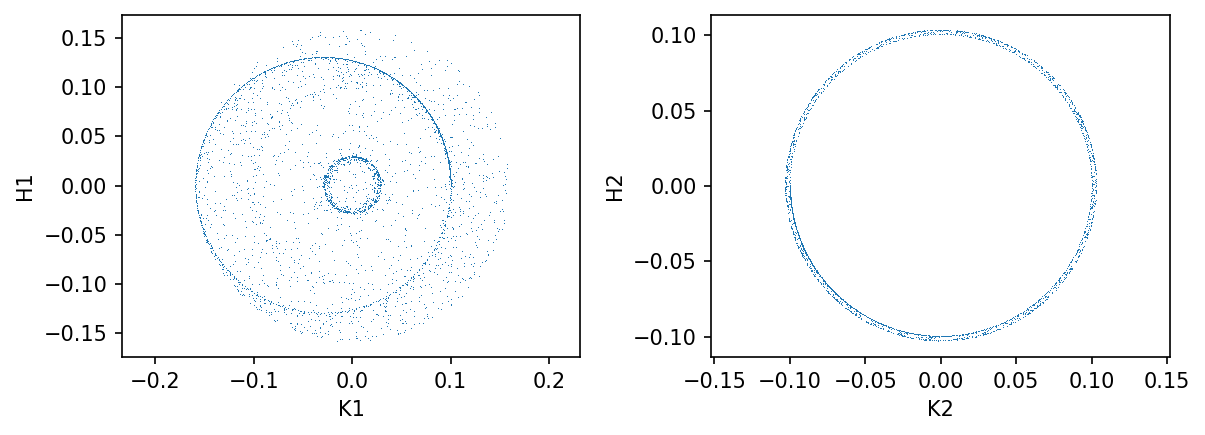

In [12]:
plt.figure(dpi=150, figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(df.K1, df.H1, ',')
plt.xlabel("K1")
plt.ylabel("H1")
plt.axis("equal")
plt.subplot(1,2,2)
plt.plot(df.K2, df.H2, ',')
plt.xlabel("K2")
plt.ylabel("H2")
plt.axis("equal")
plt.tight_layout()
plt.show()